In [58]:
# import the imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load some data
data = pd.read_csv(
    'household_power_consumption.txt',
    sep=';',
    low_memory=False,
    na_values=['?', 'nan']
)

# Household Power Consumption Analysis

This notebook analyzes household power consumption data collected from a smart meter, examining patterns and trends in electricity usage over time. The dataset contains measurements of electric power consumption recorded at one-minute intervals.

**Key Takeaways:**
- High-resolution power consumption data allows for detailed analysis of daily, weekly, and seasonal patterns
- Multiple metrics (global active power, voltage, sub-metering) provide insights into different aspects of household energy use

In [61]:
# view the data 
display(data.head())
data.info()

,global_active_power,global_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   global_active_power    float64
 1   global_reactive_power  float64
 2   voltage                float64
 3   global_intensity       float64
 4   sub_metering_1         float64
 5   sub_metering_2         float64
 6   sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [60]:
# columns are capitalised, date and time is in object and should be combined to be datetime
data.columns = data.columns.str.lower()
data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'], format='%d/%m/%Y %H:%M:%S')
data.set_index('datetime', inplace=True)
data.drop(columns=['date', 'time'], inplace=True)


## Data Preprocessing

The dataset requires several cleaning steps before analysis, including handling missing values and converting text-based date/time information into proper datetime format.

**Key Takeaways:**
- Text-based date/time columns need to be properly parsed for time series analysis
- The dataset contains missing values (marked as '?') that require attention before proceeding with analysis

In [66]:
# check for missing values
print(data[data.isnull().any(axis=1)].index.to_series().diff().value_counts().head())
display(data[data.isnull().any(axis=1)])
print(f"\nBeginning and end date: {data.index.min()} to {data.index.max()}")

datetime
0 days 00:01:00     25908
33 days 06:29:00        5
8 days 22:44:00         1
15 days 08:27:00        1
13 days 22:37:00        1
Name: count, dtype: int64


,global_active_power,global_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3
datetime,,,,,,,
2006-12-21 11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-21 11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-14 18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2010-09-28 19:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-28 19:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-28 19:11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Beginning and end date: 2006-12-16 17:24:00 to 2010-11-26 21:02:00


In [63]:
print(data.index.min(), data.index.max())
data.index.to_series().diff().value_counts().head()

2006-12-16 17:24:00 2010-11-26 21:02:00


datetime
0 days 00:01:00    2075258
Name: count, dtype: int64

In [68]:
# We can see there are swathes of missing data, fully grouped together. On the bright side, we can remove it all and the wholedata set will still be intact.
df = data.dropna(how='all')

# verify the data is now clean
print(df.isna().sum().sum())

0


## Handling Missing Values

After initial inspection, we found that missing values in this dataset appear in contiguous blocks rather than randomly scattered. This pattern suggests entire measurement periods were missed, possibly due to sensor downtime or data transmission issues.

**Key Takeaways:**
- Missing data appears in blocks, suggesting systematic measurement gaps rather than random errors
- Complete removal of missing values is feasible in this case without significantly compromising the analysis

In [70]:
# data looks good - let's visualise it
df.sample(3)

,global_active_power,global_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3
datetime,,,,,,,
2007-11-28 22:03:00,2.374,0.084,239.96,9.8,0.0,0.0,17.0
2010-03-03 13:40:00,0.268,0.000,244.06,1.2,0.0,0.0,1.0
2009-03-29 18:06:00,1.560,0.080,237.30,6.6,0.0,1.0,17.0


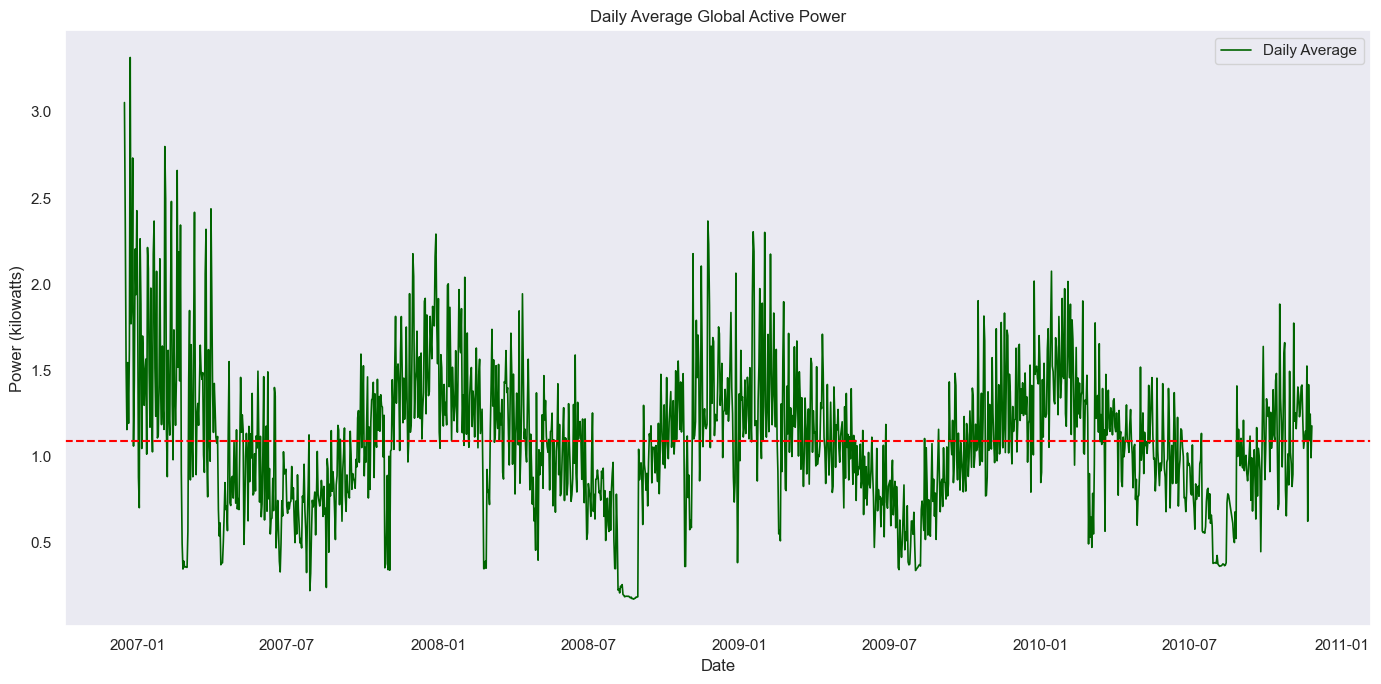

In [92]:
# if we simply plot the data, we won't be able to see much because of the sheeer volume of rows
# so let's resample it to a daily mean
daily_avg = df['global_active_power'].resample('D').mean()

# mean and median are very similar, so we can use either
overall_mean = daily_avg.mean()

# build the plot
plt.figure(figsize=(14, 7))
sns.set_theme(style='dark')
ax = sns.lineplot(data=df_plot, x='Date', y='Power', color='darkgreen', linewidth=1.2, label='Daily Average')

plt.axhline(overall_mean, color='red', linestyle='--', label='Overall Mean')

# set the title and labels
plt.title('Daily Average Global Active Power')
plt.xlabel('Date')
plt.ylabel('Power (kilowatts)')
plt.tight_layout()
plt.show()


## Daily Power Consumption Trends

Resampling the minute-level data to daily averages reveals the overall consumption pattern over time. This view smooths out the high-frequency variations while preserving the longer-term trends.

**Key Takeaways:**
- Daily averaging reduces noise while preserving seasonal and monthly patterns
- The analysis doesn't capture intra-day variations, which might hide important usage patterns related to specific times of day

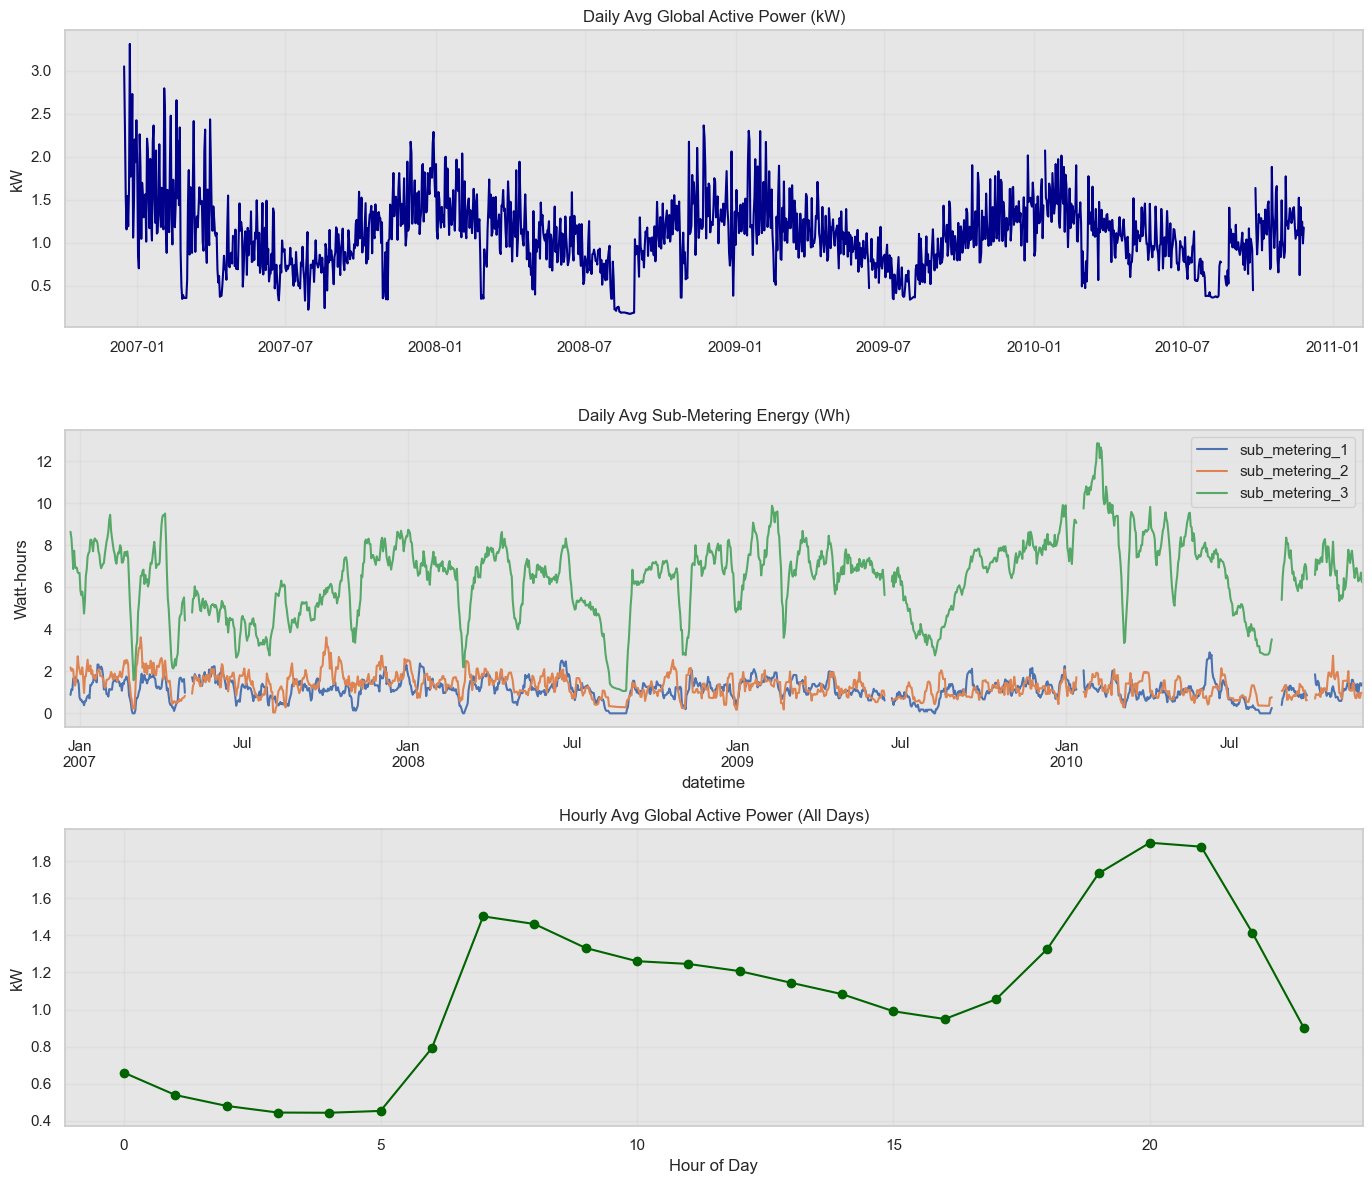

In [109]:
# Prep: Daily averages
daily_power = df['global_active_power'].resample('D').mean()
daily_subs = df[['sub_metering_1', 'sub_metering_2', 'sub_metering_3']].resample('D').mean()

# Prep: Hourly pattern across all days
hourly_avg = df.groupby(df.index.hour)['global_active_power'].mean()

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(14, 12), sharex=False)

# 1. Global Active Power
axs[0].plot(daily_power.index, daily_power.values, color='darkblue')
axs[0].set_title('Daily Avg Global Active Power (kW)')
axs[0].set_ylabel('kW')
axs[0].grid(True, alpha=0.3)

# 2. Sub-meterings
daily_subs.rolling(window=7).mean().plot(ax=axs[1])
axs[1].set_title('Daily Avg Sub-Metering Energy (Wh)')
axs[1].set_ylabel('Watt-hours')
axs[1].grid(True, alpha=0.3)

# 3. Hourly Pattern
axs[2].plot(hourly_avg.index, hourly_avg.values, marker='o', color='darkgreen')
axs[2].set_title('Hourly Avg Global Active Power (All Days)')
axs[2].set_xlabel('Hour of Day')
axs[2].set_ylabel('kW')
axs[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Multi-Perspective Power Analysis

Examining the data from multiple angles provides a more comprehensive understanding of power consumption patterns. This includes looking at global consumption, sub-metering for specific circuits, and hourly patterns across all days.

**Key Takeaways:**
- Sub-metering data reveals which specific household systems contribute most to overall consumption
- Hourly patterns expose daily routines and habits that influence energy use, though we can't identify specific activities causing consumption spikes

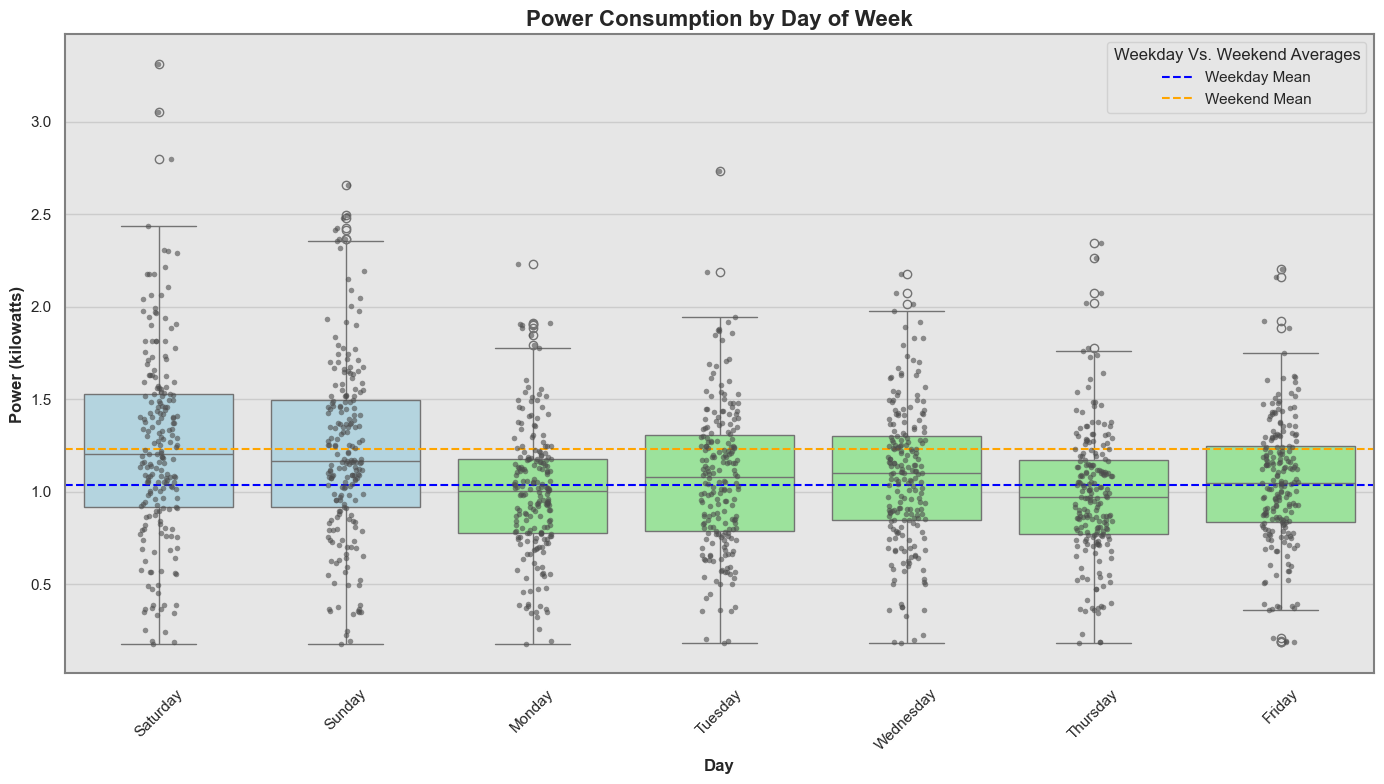

In [108]:
# Create day of week and weekend indicator
daily_avg = df['global_active_power'].resample('D').mean()
df_plot = pd.DataFrame({'Power': daily_avg})
df_plot['Day'] = df_plot.index.day_name()
df_plot['Is_Weekend'] = df_plot['Day'].isin(['Saturday', 'Sunday'])

# Calculate mean values for weekday and weekend
weekend_mean = df_plot[df_plot['Is_Weekend']]['Power'].mean()
weekday_mean = df_plot[~df_plot['Is_Weekend']]['Power'].mean()

# Plot comparison
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid", {"axes.facecolor": "#e6e6e6"})

# Box plot comparing weekday vs weekend
ax = sns.boxplot(x='Day', y='Power', data=df_plot, hue='Day',
                palette=['lightblue' if day in ['Saturday', 'Sunday'] else 'lightgreen' 
                         for day in df_plot['Day'].unique()])

# Add individual points for more detail
sns.stripplot(x='Day', y='Power', data=df_plot, size=4, color=".3", alpha=0.6)

ax.axhline(weekday_mean, color='blue', linestyle='--', label='Weekday Mean')
ax.axhline(weekend_mean, color='orange', linestyle='--', label='Weekend Mean')

# Add custom styling
plt.title('Power Consumption by Day of Week', fontsize=16, fontweight='bold')
plt.xlabel('Day', fontsize=12, fontweight='bold')
plt.ylabel('Power (kilowatts)', fontsize=12, fontweight='bold')
plt.legend(title='Weekday Vs. Weekend Averages', loc='upper right')
plt.xticks(rotation=45)

# Add grey border around the plot
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('gray')
    spine.set_linewidth(1.5)

plt.tight_layout()
plt.show()

## Weekday vs. Weekend Consumption Patterns

Comparing power consumption across different days of the week reveals behavioral patterns related to work schedules and lifestyle differences between weekdays and weekends.

**Key Takeaways:**
- Day-of-week patterns reflect household occupancy and activity differences between workdays and days off
- This analysis doesn't account for holidays, special events, or seasonal variations that might influence the weekday/weekend patterns

## Conclusion and Limitations

This analysis reveals several patterns in household electricity consumption across different time scales and measurement types. However, there are important limitations to consider.

**Key Takeaways:**
- The dataset doesn't include contextual information such as weather conditions, household occupancy, or specific appliance usage, limiting causal analysis
- While we can observe patterns, we cannot determine the energy efficiency of the household or compare against benchmarks without additional reference data